In [1]:
!pip install prince


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import ast
import prince

In [3]:
data = pd.read_csv('biosensing_data.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
label_encoder = LabelEncoder()
df['classification_label_number'] = label_encoder.fit_transform(df.iloc[:, -1])

In [6]:
# Convert the string representation of lists to actual lists
df['Microbial_Signature'] = df['Microbial_Signature'].apply(ast.literal_eval)

# Expand the list of arrays into separate columns
df_expanded = pd.DataFrame(df['Microbial_Signature'].tolist(), columns=['Feature1', 'Feature2', 'Feature3'])

print(df_expanded.head())  # Check the first few rows

   Feature1  Feature2  Feature3
0  0.686348  0.351971  0.479209
1  0.511493  0.590626  0.437371
2  0.343812  0.369256  0.116776
3  0.666280  0.464673  0.450686
4  0.766623  0.388922  0.387402


In [7]:
# Convert all expanded columns to numeric, coercing errors to NaN
df_expanded = df_expanded.apply(pd.to_numeric, errors='coerce')

print(df_expanded.dtypes)
print(df_expanded.head())

Feature1    float64
Feature2    float64
Feature3    float64
dtype: object
   Feature1  Feature2  Feature3
0  0.686348  0.351971  0.479209
1  0.511493  0.590626  0.437371
2  0.343812  0.369256  0.116776
3  0.666280  0.464673  0.450686
4  0.766623  0.388922  0.387402


In [8]:
print("Any negative values?", (df_expanded < 0).sum().sum())
print("Any NaNs?", df_expanded.isna().sum().sum())

Any negative values? 20
Any NaNs? 0


In [9]:
df_expanded['Classification_label'] = df['classification_label_number']

In [10]:
df_expanded.dtypes

Feature1                float64
Feature2                float64
Feature3                float64
Classification_label      int32
dtype: object

In [11]:
# Keep rows where all values are >= 0 (no negative values in any column)
df_expanded = df_expanded[(df_expanded >= 0).all(axis=1)]

In [30]:
print("Any negative values?", (df_expanded < 0).sum().sum())
print("Any NaNs?", df_expanded.isna().sum().sum())

Any negative values? 0
Any NaNs? 0


In [13]:
ca = prince.CA(n_components=2)
ca = ca.fit(df_expanded)

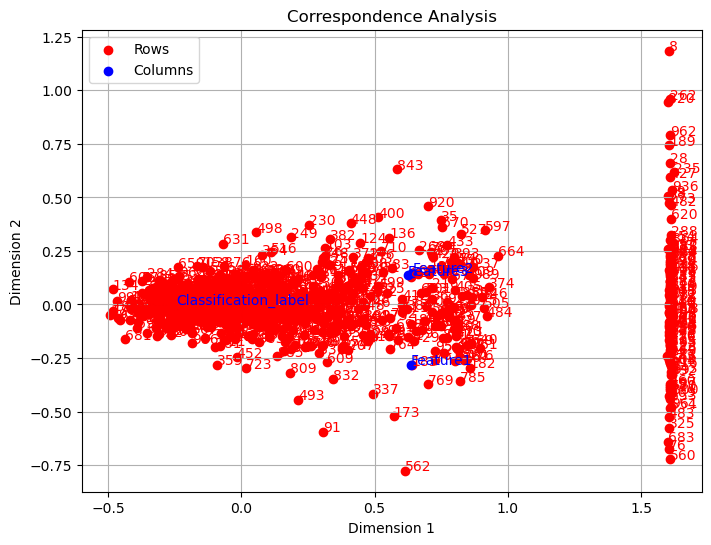

In [14]:
import matplotlib.pyplot as plt

# Extract row and column coordinates from the fitted CA object
row_coords = ca.row_coordinates(df_expanded)
col_coords = ca.column_coordinates(df_expanded)

plt.figure(figsize=(8, 6))

# Plot row coordinates
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], c='red', label='Rows')

# Plot column coordinates
plt.scatter(col_coords.iloc[:, 0], col_coords.iloc[:, 1], c='blue', label='Columns')

# Annotate rows with their index labels
for i, txt in enumerate(df_expanded.index):
    plt.annotate(txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), color='red')

# Annotate columns with their names
for i, txt in enumerate(df_expanded.columns):
    plt.annotate(txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), color='blue')

plt.title('Correspondence Analysis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()